In [1]:
%load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from datetime import datetime

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
#     plt.savefig(datetime.now().strftime("%Y/%m/%d %H:%M:%S") + ".pdf")
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)



['inputs', 'targets']
['inputs', 'targets']


In [2]:
from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

論文　Batch+CNN

PrintLayer fprop: (100, 1, 28, 28)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 12, 12)
PrintLayer fprop: (100, 10, 8, 8)
PrintLayer fprop: (100, 10, 8, 8)
PrintLayer fprop: (100, 20, 4, 4)
PrintLayer fprop: (100, 20, 4, 4)
PrintLayer fprop: (100, 320)
PrintLayer fprop: (100, 320)
PrintLayer fprop: (100, 20, 4, 4)
PrintLayer fprop: (100, 20, 2, 2)
PrintLayer fprop: (100, 80)
PrintLayer fprop: (100, 80)
PrintLayer fprop: (100, 47)


A Jupyter Widget

A Jupyter Widget

PrintLayer bprop: (100, 47)
PrintLayer param: (100, 47)
PrintLayer bprop: (100, 80)
PrintLayer param: (100, 80)
PrintLayer bprop: (100, 80)
PrintLayer param: (100, 80)
PrintLayer bprop: (100, 20, 2, 2)
PrintLayer param: (100, 20, 2, 2)
PrintLayer bprop: (100, 20, 4, 4)
PrintLayer param: (100, 20, 4, 4)
PrintLayer bprop: (100, 320)
PrintLayer param: (100, 320)
PrintLayer bprop: (100, 320)
PrintLayer param: (100, 320)
PrintLayer bprop: (100, 20, 4, 4)
PrintLayer param: (100, 20, 4, 4)
PrintLayer bprop: (100, 20, 4, 4)
PrintLayer param: (100, 20, 4, 4)
PrintLayer bprop: (100, 10, 8, 8)
PrintLayer param: (100, 10, 8, 8)
PrintLayer bprop: (100, 10, 8, 8)
PrintLayer param: (100, 10, 8, 8)
PrintLayer bprop: (100, 5, 12, 12)
PrintLayer param: (100, 5, 12, 12)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 1, 28, 28)
PrintLayer param: (100, 1, 28, 28)


Epoch 1: 4456.8s to complete
    error(train)=8.54e-01, acc(train)=7.46e-01, error(valid)=8.51e-01, acc(valid)=7.51e-01


A Jupyter Widget

Epoch 2: 6263.5s to complete
    error(train)=6.77e-01, acc(train)=7.90e-01, error(valid)=6.79e-01, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 3: 4390.0s to complete
    error(train)=5.70e-01, acc(train)=8.16e-01, error(valid)=5.79e-01, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 4: 4587.8s to complete
    error(train)=5.43e-01, acc(train)=8.20e-01, error(valid)=5.46e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 5: 5052.3s to complete
    error(train)=5.13e-01, acc(train)=8.31e-01, error(valid)=5.24e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 6: 3486.8s to complete
    error(train)=4.90e-01, acc(train)=8.36e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 7: 2257.0s to complete
    error(train)=4.76e-01, acc(train)=8.42e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


A Jupyter Widget

Epoch 8: 2261.1s to complete
    error(train)=4.67e-01, acc(train)=8.42e-01, error(valid)=4.82e-01, acc(valid)=8.39e-01


A Jupyter Widget

Epoch 9: 2275.6s to complete
    error(train)=4.64e-01, acc(train)=8.43e-01, error(valid)=4.80e-01, acc(valid)=8.39e-01


A Jupyter Widget

Epoch 10: 2703.3s to complete
    error(train)=4.48e-01, acc(train)=8.49e-01, error(valid)=4.73e-01, acc(valid)=8.40e-01


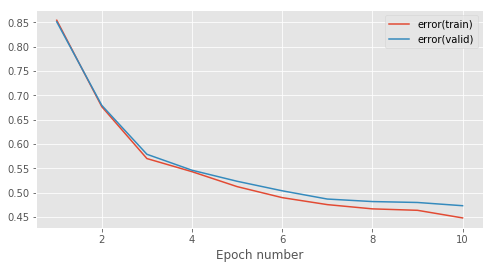

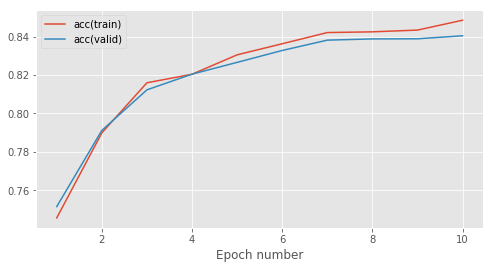

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
num_epochs = 10
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
kernel_dim = 5

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer((1,28,28,)) , #(1, 28, 28)
    PrintLayer(),
    ConvolutionalLayer(1, 5, 28, 28, 5, 5) , # (5, 24, 24)
    PrintLayer(),
    TanhLayer(), # (5, 24, 24)
    PrintLayer(),
    MaxPoolingLayer() ,  # (5, 12, 12)
    PrintLayer(),
    ConvolutionalLayer(5,10,12,12,5,5), # (10, 8, 8)
    PrintLayer(),
    TanhLayer(), # (10, 8, 8)
    PrintLayer(),
    ConvolutionalLayer(10,20,8,8,5,5), # (20, 4, 4)
    PrintLayer(),
    TanhLayer(), # (20, 4, 4)
    PrintLayer(),
    ReshapeLayer((20*4*4,)), #(320)
    PrintLayer(),
    BatchNormalizationLayer(320),
    PrintLayer(),
    ReshapeLayer((20, 4, 4,)), # (20, 4, 4)
    
    PrintLayer(),
    MaxPoolingLayer(), # (20, 2, 2)
    PrintLayer(),
    ReshapeLayer((20*2*2,)), #(80)
    PrintLayer(),
    BatchNormalizationLayer(80),
    PrintLayer(),
    AffineLayer(80, output_dim, weights_init, biases_init), # 47
    PrintLayer()
])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=0.03)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [4]:
plt.savefig('aa.pdf')